In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable
from torchvision import models
from torchsummary import summary

%matplotlib inline

# 1. Linear Regression

Trivial case of fitting a straight line 

Note: we use $t$ here for time, but it is the same as using $(x,y)$.

a. We have $N$ data points with input {$t_n$} and targets {$x_n$} 

b. Want to find the best fit line $f_n=k_1t_n+k_0$ in the least-squares sense

c. Define an error function $E=\frac{1}{2N}\sum_{n=1}^{N}(f_n-x_n)^2$

d. Goal: Find $k_0, k_1$ to minimize $E$

### 1.1 Using calculus, we have to minimizse $\frac{\partial E}{\partial k_i}=0$:

This gives us:

$k_0 = \frac{\langle t^2\rangle \langle x\rangle -\langle xt\rangle \langle t\rangle }{\langle t^2\rangle -\langle t\rangle ^2}$

$k_1= \frac{\langle xt\rangle - \langle x\rangle \langle t\rangle}{\langle t^2\rangle - \langle t\rangle ^2}$

### 1.2 Example fitting x = 3t-5

$k_0 =-5$,
$k_1=3$

Notice that increasing $N$ makes the estimates of $k_0,k_1$ closer to the actual values

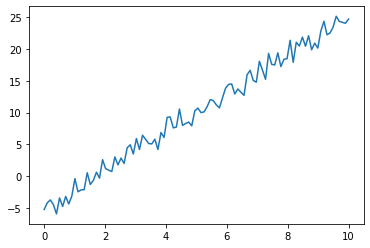

In [2]:
N=100
mu,sigma=0,1
e=np.random.normal(mu,sigma,N)

T=np.linspace(0,10,N)
X=3*T-5+e

plt.plot(T,X);

In [3]:
t_mean=np.mean(T)
t2_mean=np.mean(T**2)
x_mean=np.mean(X)
xt_mean=np.mean(X*T)

k_0=(t2_mean*x_mean-xt_mean*t_mean)/(t2_mean-t_mean**2)
k_1=(xt_mean-x_mean*t_mean)/(t2_mean-t_mean**2)

k_0= -5.07364509615009  k_1= 3.013563613057548


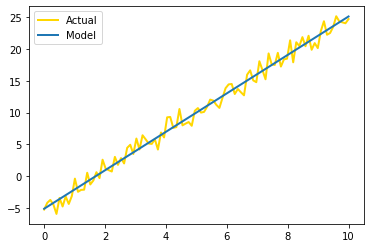

In [24]:
F=T*k_1+k_0
print('k_0=',k_0,' k_1=',k_1)

plt.plot(T,X,label='Actual',lw=2,color='gold')
plt.plot(T,F,label='Model',lw=2)
plt.legend(loc='best');

### 1.3 Using PyTorch to fit this automatically

#### 1.3.1 Model Architecture

Define model architecture through a class that takes torch.nn.Module, the basic neural network module containing the required functions

In [5]:
class LinearRegression(torch.nn.Module):
    def __init__(self,inputSize,outputSize):
        super(LinearRegression,self).__init__()
        self.linear=torch.nn.Linear(inputSize,outputSize)

    def forward(self,x):
        out = self.linear(x)
        return out

#### 1.3.2 Model Instantiation

Instantiate the model, initialize the loss and optimization functions for training the model. We are using the mean squared error loss function and stochastic gradient descent for optimization.

In [33]:
inputDim=1        
outputDim=1   
learningRate=0.01 
epochs=1000

model=LinearRegression(inputDim,outputDim)

# For GPU
if torch.cuda.is_available():
    model.cuda()

In [34]:
criterion=torch.nn.MSELoss() 
optimizer=torch.optim.SGD(model.parameters(),lr=learningRate)

#### 1.3.3 Model Training

Increasing the number of epochs will get the results to greater accuracy

In [35]:
# Reshape data for pytorch
t_train=T.reshape(-1,1)
x_train=X.reshape(-1,1)

t_train=np.float32(t_train)
x_train=np.float32(x_train)

for epoch in range(epochs):
    # Converting inputs and targets to Variable
    if torch.cuda.is_available():
        inputs=Variable(torch.from_numpy(t_train).cuda())
        targets=Variable(torch.from_numpy(x_train).cuda())
    else:
        inputs=Variable(torch.from_numpy(t_train))
        targets=Variable(torch.from_numpy(x_train))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs=model(inputs)

    # get loss for the predicted output
    loss=criterion(outputs,targets)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {},loss {}'.format(epoch,loss.item()))

tensor(82.1016, grad_fn=<MseLossBackward>)
epoch 0,loss 82.10160064697266
tensor(17.9285, grad_fn=<MseLossBackward>)
epoch 1,loss 17.928539276123047
tensor(11.4773, grad_fn=<MseLossBackward>)
epoch 2,loss 11.477286338806152
tensor(10.7518, grad_fn=<MseLossBackward>)
epoch 3,loss 10.751809120178223
tensor(10.5951, grad_fn=<MseLossBackward>)
epoch 4,loss 10.595067977905273
tensor(10.4956, grad_fn=<MseLossBackward>)
epoch 5,loss 10.495574951171875
tensor(10.4026, grad_fn=<MseLossBackward>)
epoch 6,loss 10.40259075164795
tensor(10.3111, grad_fn=<MseLossBackward>)
epoch 7,loss 10.311077117919922
tensor(10.2205, grad_fn=<MseLossBackward>)
epoch 8,loss 10.2205228805542
tensor(10.1309, grad_fn=<MseLossBackward>)
epoch 9,loss 10.13086986541748
tensor(10.0421, grad_fn=<MseLossBackward>)
epoch 10,loss 10.042106628417969
tensor(9.9542, grad_fn=<MseLossBackward>)
epoch 11,loss 9.954219818115234
tensor(9.8672, grad_fn=<MseLossBackward>)
epoch 12,loss 9.867205619812012
tensor(9.7811, grad_fn=<MseLoss

tensor(2.1516, grad_fn=<MseLossBackward>)
epoch 231,loss 2.151581048965454
tensor(2.1418, grad_fn=<MseLossBackward>)
epoch 232,loss 2.141838312149048
tensor(2.1322, grad_fn=<MseLossBackward>)
epoch 233,loss 2.132193088531494
tensor(2.1226, grad_fn=<MseLossBackward>)
epoch 234,loss 2.1226425170898438
tensor(2.1132, grad_fn=<MseLossBackward>)
epoch 235,loss 2.1131865978240967
tensor(2.1038, grad_fn=<MseLossBackward>)
epoch 236,loss 2.1038243770599365
tensor(2.0946, grad_fn=<MseLossBackward>)
epoch 237,loss 2.094555139541626
tensor(2.0854, grad_fn=<MseLossBackward>)
epoch 238,loss 2.0853776931762695
tensor(2.0763, grad_fn=<MseLossBackward>)
epoch 239,loss 2.0762903690338135
tensor(2.0673, grad_fn=<MseLossBackward>)
epoch 240,loss 2.067293643951416
tensor(2.0584, grad_fn=<MseLossBackward>)
epoch 241,loss 2.0583858489990234
tensor(2.0496, grad_fn=<MseLossBackward>)
epoch 242,loss 2.0495667457580566
tensor(2.0408, grad_fn=<MseLossBackward>)
epoch 243,loss 2.040834903717041
tensor(2.0322, gra

epoch 429,loss 1.3049380779266357
tensor(1.3036, grad_fn=<MseLossBackward>)
epoch 430,loss 1.303580641746521
tensor(1.3022, grad_fn=<MseLossBackward>)
epoch 431,loss 1.302235722541809
tensor(1.3009, grad_fn=<MseLossBackward>)
epoch 432,loss 1.3009045124053955
tensor(1.2996, grad_fn=<MseLossBackward>)
epoch 433,loss 1.2995868921279907
tensor(1.2983, grad_fn=<MseLossBackward>)
epoch 434,loss 1.2982821464538574
tensor(1.2970, grad_fn=<MseLossBackward>)
epoch 435,loss 1.2969903945922852
tensor(1.2957, grad_fn=<MseLossBackward>)
epoch 436,loss 1.2957115173339844
tensor(1.2944, grad_fn=<MseLossBackward>)
epoch 437,loss 1.2944450378417969
tensor(1.2932, grad_fn=<MseLossBackward>)
epoch 438,loss 1.2931910753250122
tensor(1.2919, grad_fn=<MseLossBackward>)
epoch 439,loss 1.2919498682022095
tensor(1.2907, grad_fn=<MseLossBackward>)
epoch 440,loss 1.2907204627990723
tensor(1.2895, grad_fn=<MseLossBackward>)
epoch 441,loss 1.289503574371338
tensor(1.2883, grad_fn=<MseLossBackward>)
epoch 442,loss 

tensor(1.1777, grad_fn=<MseLossBackward>)
epoch 693,loss 1.1777410507202148
tensor(1.1776, grad_fn=<MseLossBackward>)
epoch 694,loss 1.1776429414749146
tensor(1.1775, grad_fn=<MseLossBackward>)
epoch 695,loss 1.1775460243225098
tensor(1.1774, grad_fn=<MseLossBackward>)
epoch 696,loss 1.1774497032165527
tensor(1.1774, grad_fn=<MseLossBackward>)
epoch 697,loss 1.1773545742034912
tensor(1.1773, grad_fn=<MseLossBackward>)
epoch 698,loss 1.1772602796554565
tensor(1.1772, grad_fn=<MseLossBackward>)
epoch 699,loss 1.1771669387817383
tensor(1.1771, grad_fn=<MseLossBackward>)
epoch 700,loss 1.1770745515823364
tensor(1.1770, grad_fn=<MseLossBackward>)
epoch 701,loss 1.1769828796386719
tensor(1.1769, grad_fn=<MseLossBackward>)
epoch 702,loss 1.1768923997879028
tensor(1.1768, grad_fn=<MseLossBackward>)
epoch 703,loss 1.176802635192871
tensor(1.1767, grad_fn=<MseLossBackward>)
epoch 704,loss 1.1767140626907349
tensor(1.1766, grad_fn=<MseLossBackward>)
epoch 705,loss 1.1766258478164673
tensor(1.1765

tensor(1.1685, grad_fn=<MseLossBackward>)
epoch 961,loss 1.1685221195220947
tensor(1.1685, grad_fn=<MseLossBackward>)
epoch 962,loss 1.168515682220459
tensor(1.1685, grad_fn=<MseLossBackward>)
epoch 963,loss 1.168508768081665
tensor(1.1685, grad_fn=<MseLossBackward>)
epoch 964,loss 1.1685023307800293
tensor(1.1685, grad_fn=<MseLossBackward>)
epoch 965,loss 1.1684954166412354
tensor(1.1685, grad_fn=<MseLossBackward>)
epoch 966,loss 1.1684889793395996
tensor(1.1685, grad_fn=<MseLossBackward>)
epoch 967,loss 1.1684825420379639
tensor(1.1685, grad_fn=<MseLossBackward>)
epoch 968,loss 1.1684762239456177
tensor(1.1685, grad_fn=<MseLossBackward>)
epoch 969,loss 1.168470025062561
tensor(1.1685, grad_fn=<MseLossBackward>)
epoch 970,loss 1.1684634685516357
tensor(1.1685, grad_fn=<MseLossBackward>)
epoch 971,loss 1.1684571504592896
tensor(1.1685, grad_fn=<MseLossBackward>)
epoch 972,loss 1.168450951576233
tensor(1.1684, grad_fn=<MseLossBackward>)
epoch 973,loss 1.1684448719024658
tensor(1.1684, g

#### 1.3.4 Results

In [36]:
# Retrieve parameters 
print(list(model.named_parameters()))

[('linear.weight', Parameter containing:
tensor([[3.0071]], requires_grad=True)), ('linear.bias', Parameter containing:
tensor([-5.0308], requires_grad=True))]


In [37]:
# Predicted targets are available already from above also 
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted=model(Variable(torch.from_numpy(t_train).cuda())).cpu().data.numpy()
    else:
        predicted=model(Variable(torch.from_numpy(t_train))).data.numpy()

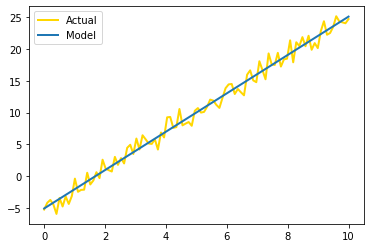

In [38]:
plt.plot(T,X,label='Actual',lw=2,color='gold')
plt.plot(T,predicted,label='Model',lw=2)
plt.legend(loc='best');

# 2. Polynomial Regression